In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy.integrate import simps
import math

                        # Gradient Descent
    alpha = parameter
    step_grad = const
    grad = dE/dalpha
    updated_alpha = alpha - (step_grad * grad)
    

                             # Gradient
 The expression of gradient would change, according to the energy expectation expression

         # Implementing the gradient descent opt with the help of initial values

In [20]:
class Variational_method:
    def __init__(self,psi_trial, alpha_ini, step, num_iterations,tolerance):
        self.f = psi_trial
        self.alpha_ini = alpha_ini
        self.step = step
        self.num_iterations = num_iterations
        self.tolerance = tolerance
        self.m_e = 1
        self.h_cut = 1
        self.g = 10
        
    def dE_dalpha(self,alpha0, alpha1, E0, E1):
        derivative = (E1 - E0)/(alpha1 - alpha0)
        return derivative

    # Returns the derivative of particular wavefunction wrt x on the whole x-grid
    # therefore f_dash returns the (n-1) derivative points for n points on x-grid
    def d_dx(self,x,alpha):
        h = x[1] - x[0]
        f_dash = np.zeros(len(x))
        for i in range(len(x)-1):
            f_dash[i] = ( self.f(alpha,x[i+1]) - self.f(alpha,x[i]) )/h
    
        return f_dash
    
    def d_2_dx(self,x, alpha):
        h = x[1] - x[0]
        f_double_dash = np.zeros(len(x))
    
        for i in range(1, len(x)-1):
            f_double_dash[i] = ( self.f(alpha,x[i+1]) - 2*self.f(alpha,x[i]) + self.f(alpha,x[i-1])) / h**2
        
        return f_double_dash
    
    def plots(self, alpha_list, energy_list, iteration_list):
        plt.subplot(2,1,1)
        plt.plot(alpha_list, energy_list)
        plt.xlabel("updated_alphas")
        plt.ylabel("Energy")
        plt.subplot(2,1,2)
        plt.xlabel("Iterations")
        plt.ylabel("Energy")
        plt.plot(iteration_list, energy_list)
    
    def bra_H_ket(self,V, x_grid,alpha):
        T_ket = (-1/2)*self.d_2_dx(x_grid, alpha)
    
        bra_T_ket = simps(np.conj(self.f(alpha,x_grid)) * T_ket, x_grid)
        bra_V_ket = simps(np.conj(self.f(alpha,x_grid))*V*self.f(alpha,x_grid), x_grid)
    
        bra_H_ket = bra_T_ket + bra_V_ket
    
        return bra_H_ket
    
    def bra_ket_overlap(self,x_grid,alpha):
        bra_ket_integrate = simps(np.conj(self.f(alpha,x_grid))*self.f(alpha,x_grid) , x_grid)
    
        return bra_ket_integrate
    
    def expected_energy(self,V, x_grid,alpha):
        bra_h_ket = self.bra_H_ket(V, x_grid, alpha)
        bra_ket_integrate = self.bra_ket_overlap(x_grid,alpha)
    
        bra_E_ket = bra_h_ket / bra_ket_integrate
    
        return bra_E_ket
    
    def gradient_descent(self):
         # Initiate empty list : used for recording data during the iteration
        alpha_update_list = []
        E_list = []
        iteration_list= []

        # define the initial constants and function
        x_grid = np.arange(0,20,0.01)
        V = self.m_e*self.g*x_grid
        converged = False

        # Intitial Values that will be used to start and implement the gradient descent 
        E0 = self.expected_energy(V, x_grid, self.alpha_ini)
        alpha0 = self.alpha_ini
        alpha = alpha0 + self.step
        iteration = 0

        while not converged and iteration < self.num_iterations:
            E1 = self.expected_energy(V, x_grid,alpha)
            derivative = self.dE_dalpha(alpha0, alpha, E0, E1)

            # update the parameter with SGD 
            updated_alpha = alpha - step*derivative

            # Record the data
            alpha_update_list.append(updated_alpha)
            E_list.append(E1)
            iteration_list.append(iteration)

            # arrange the parameters for next iteration
            alpha0 = alpha
            alpha = updated_alpha
            E0  = E1

            # Print at intervals of (num_iterations/10, here it is: 2000/10 = 200)
            # therefore we print at every successive 200th iteration interval 
            if iteration% math.ceil(num_iterations / 10) == 0:
                print(f"Iteration {iteration:4d}: Expected_Energy {E_list[-1]} and alpha: {alpha_update_list[-1]}   ")

            # Convergence criteria and iteration update
            converged = abs(alpha-alpha0) < tolerance
            iteration += 1
        
        self.plots(alpha_update_list, E_list, iteration_list)
        
        return E_list, alpha_update_list, iteration_list

                        # Trial Wavefunction 1

Iteration    0: Expected_Energy 15.486022180219681 and alpha: 1.0149844794033636   
Iteration  200: Expected_Energy 9.602874827274055 and alpha: 1.9474458134452413   
Iteration  400: Expected_Energy 9.22815128440635 and alpha: 2.2125506538426545   
Iteration  600: Expected_Energy 9.150933030439496 and alpha: 2.334084370992166   
Iteration  800: Expected_Energy 9.13129060580264 and alpha: 2.395576746146091   
Iteration 1000: Expected_Energy 9.125860922782286 and alpha: 2.4279518011671017   
Iteration 1200: Expected_Energy 9.124300074650247 and alpha: 2.445321616994177   
Iteration 1400: Expected_Energy 9.123842378844598 and alpha: 2.454730832947284   
Iteration 1600: Expected_Energy 9.123706755714739 and alpha: 2.4598536796319976   
Iteration 1800: Expected_Energy 9.123666342404839 and alpha: 2.462650402649895   


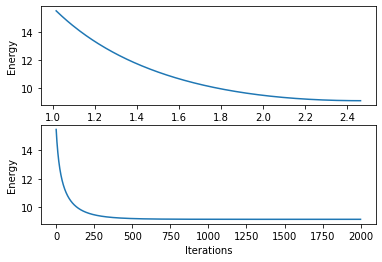

In [30]:
psi_trial = lambda alpha, x: x* np.exp(-alpha*x)
alpha_ini = 1.0
step = 0.001
num_iterations = 2000
tolerance = 1.0e-6
method=Variational_method(psi_trial,alpha_ini, step, num_iterations, tolerance)
Energy_list, alpha_list, iteration_list = method.gradient_descent()

                         # Trial Wavefunction 2

Iteration    0: Expected_Energy 129.92780638648105 and alpha: 1.057590483546734   
Iteration  200: Expected_Energy 14.30822474414364 and alpha: 4.496227369621801   
Iteration  400: Expected_Energy 11.179086513267034 and alpha: 5.271404409876571   
Iteration  600: Expected_Energy 10.188642097625479 and alpha: 5.711701369709644   
Iteration  800: Expected_Energy 9.785197132220656 and alpha: 5.9934390615590365   
Iteration 1000: Expected_Energy 9.604439180046642 and alpha: 6.1822236118631055   
Iteration 1200: Expected_Energy 9.519629307556169 and alpha: 6.311605805618358   
Iteration 1400: Expected_Energy 9.478817543946644 and alpha: 6.401384851294109   
Iteration 1600: Expected_Energy 9.458881787819209 and alpha: 6.464144066249676   
Iteration 1800: Expected_Energy 9.449052110741265 and alpha: 6.508217871816253   


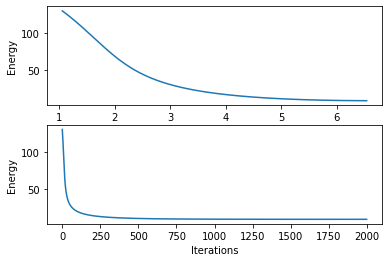

In [32]:
psi_trial = lambda alpha, x: x**2*np.exp(-alpha*x**0.5)
alpha_ini = 1.0
step = 0.001
num_iterations = 2000
tolerance = 1.0e-6
method=Variational_method(psi_trial,alpha_ini, step, num_iterations, tolerance)
Energy_list,alpha_list,iteration_list = method.gradient_descent()